# **Machine Learning: Personal Loan Campaign - Solution Notebook**

___

# **Problem Statement**

###**Context:**

AllLife Bank in the US has a growing customer base, with most of them being liability customers (depositors). But the number of customers who are also borrowers is quite small. The bank wants to increase the number of customers who take personal loans. Last year, they ran a campaign and got a 9% success rate, which encouraged the marketing team to do more targeted campaigns.

### **Objective:**

As a Data Scientist, we need to build a machine learning model that can predict the probability of a customer taking a personal loan from the bank.

Since this is a classification problem, I chose a Decision Tree model for its interpretability and its ability to handle both numerical and categorical data. The target column (Personal_Loan) is binary — Yes or No, indicating whether the customer will accept the personal loan offer. This makes it a binary classification task. I will also use the model to identify which customer attributes influence loan decisions the most and to segment customers based on their likelihood to accept a personal loan.

### **Data Dictionary:**

The dataset contains various columns related to the All Life Bank Customers and they are as below:

* **ID**: Customer ID
* **Age**: Customerʼs age in completed years
* **Experience**: Number of years of professional experience
* **Income**: Annual income of the customer (in thousand dollars)
* **ZIP Code**: Home address ZIP code
* **Family**: Family size of the customer
* **CCAvg**: Average monthly spending on credit cards (in thousand dollars)
* **Education**: Education level
    * 1: Undergrad
    * 2: Graduate
    * 3: Advanced/Professional
* **Mortgage**: Value of house mortgage if any (in thousand dollars)
* **Personal_Loan**: Did the customer accept the personal loan offered in the last campaign? (Yes/No)
* **Securities_Account**: Does the customer have a securities account with the bank? (Yes/No)
* **CD_Account**: Does the customer have a certificate of deposit (CD) account with the bank? (Yes/No)
* **Online**: Does the customer use internet banking facilities? (Yes/No)
* **CreditCard**: Does the customer use a credit card issued by any other bank (excluding AllLife Bank)? (Yes/No)

___


# **Let us start by importing the required libraries**

In [1]:
# To load and manipulate data
import numpy as np
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Command to display the graphs
%matplotlib inline

# To split the data into training and testing sets
from sklearn.model_selection import train_test_split

# To build Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To compute classification metrics
from sklearn.metrics import(confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

___

# **Loading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# To read the dataset from google drive
loan_approval = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Loan_Modelling.csv")

In [4]:
# creating a copy of the data
data = loan_approval.copy()

#### Observations:

* The Loan_Modelling dataset has been successfully loaded and stored in the variable loan_approval. A copy of this dataset has been created and saved as data, which will be used for our model building exercise.

___

# **Data Overview**

### Viewing the first 5 rows and last 5 rows of the dataset

In [5]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Observations:

* The dataset has different customer details like Age, Education, Income, ZipCode, Family size, Monthly credit card usage, Mortgage value and other columns with Yes or No values like Securities Account, Deposit Account, Online Banking, Credit Card (from other banks) and Personal Loan.

* I checked the top and bottom 5 rows using head and tail, and I noticed that the Personal_Loan and CD_Account columns only have 0’s (No) in those rows. But this is just based on a small sample, so the actual dataset might have more variety.

* The ZipCode column needs to be treated properly instead of just being considered as numerical data.
___

### Checking the shape of the dataset.

In [7]:
data.shape

(5000, 14)

#### Observations:

* The dataset contains 5000 rows and 14 columns
___

### Checking the attribute types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations:

* From the above output, I can see that there are no missing values in the dataset.

* Also, all the data types look correct, so the dataset is clean and ready for analysis.
___

### Checking the statistical summary

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observations:

* The average age of the bank customer is 45 years and 75% of the customer are below 55 years of age.

* The average income of the customer is \$73,000 and fifty perecentage of the customers have an annual income ranging between \$39,000 to \$98,000.

* On average, a customer spends around \$1,900 per month using credit cards.

* The average of Mortgage amount is approximately \$56,000

* <u>Issues in columns that needs to be addressed:</u>

  * **Experience**: There is slight issue with Experience column, as I can see the minimum value is -3 (negative) which obviously doesn't make sense for experience column. This needs to be fixed before proceeding further.

  * **Zip code**: Needs to be handled properly to understand how a customer's location might influence the decsion-making.

___

### Checking for missing values

In [10]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


#### Observations:

* There are no missing values in any of the columns.

___

### Checking for duplicate values

In [11]:
data.duplicated().sum()

np.int64(0)

#### Observations:

* There are no duplicate values in the dataset.

___

### Dropping column with all unique values

In [12]:
data = data.drop(columns='ID')

#### Observations:

* Since the ID column contains only unique values and doesn't offer any meaningful insights, I have dropped it.
___

# **Data Pre-processing**

### Experience column

As we identified earlier, the Experience column has negative values which is not possible. I will first filter out the data to find how many rows have this issue and then come up with a solution to handle them properly.

In [13]:
# To filter the data where the years of experience is in negative and save it in a filtered dataset
filtered_data_neg_exp = data[data['Experience']<0]

# To view the filtered data
filtered_data_neg_exp.head(3)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.3,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.7,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.3,3,0,0,0,0,1,0


In [14]:
# To get the number of records where the Experience is negative
filtered_data_neg_exp.shape

(52, 13)

* There are 52 records with negative years of experience that needs to be handled properly

In [15]:
filtered_data_neg_exp['Age'].value_counts()

,count
Age,
25,18
24,17
23,12
29,3
28,1
26,1


* The negative years of experience are in age group-25, 24, 23, 29, 28 & 26.

* I’ll replace those negative values with NaN first, and then fill them in using the median experience of their respective age group.

In [16]:
# Function to replace the negative values with NaN value
def replace_neg(x):
  if x < 0:
    return np.nan
  else:
    return x

# Applying the function on the experience column
data['Experience'] = data['Experience'].apply(replace_neg)

In [17]:
# To check the missing values now
data.isnull().sum()

,0
Age,0
Experience,52
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


* We can see that now the experience column has 52 missing rows as the negative values are replaced with NaN value.

* Now will replace the NaN values with the median of that age group.

In [18]:
# Changing datatype of Experience from object to float (Since the column contains NaN values, it can't be converted into int, so will initally convert the datatype to float)
data['Experience'] = data['Experience'].astype(float)

In [19]:
# Checking the data type of experience
data['Experience'].dtype

dtype('float64')

In [20]:
# Filing the NaN values with median of that age group
data['Experience'] = data['Experience'].fillna(value = data.groupby('Age')['Experience'].transform('median'))

In [21]:
# Checking if there are any negative values in the column
data[data['Experience']<0].shape

(0, 13)

In [22]:
# Checking if there are still any missing values
data['Experience'].isna().sum()

np.int64(12)

* We still got 12 missing values this may be due to there is no enough data to calculate the median.

* Will fill the remaining NaN values with global median values of the Experience column.

In [23]:
# Filing the NaN values with global median
data['Experience'] = data['Experience'].fillna(data['Experience'].median())

In [24]:
# Checking if there are still any missing values
data['Experience'].isna().sum()

np.int64(0)

In [25]:
# Changing datatype of Experience from float to int
data['Experience'] = data['Experience'].astype(int)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.174400,11.386462,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


#### Observations:

* Now it is confirmed that there are no negative years of experience and missing values in the experience column.

* The average work experience of a customer is approximately 20 years.
___

### Zip Code column

Since the ZipCode column alone doesn’t add much value, so I decided to extract the city names from it instead, which will be more useful for our analysis. I will start by installing uszipcode library.

In [27]:
!pip install pip==23.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [28]:
# Installing uszipcode python library
!pip install uszipcode
!pip install sqlalchemy-mate==1.4.28.3

  Obtaining dependency information for uszipcode from https://files.pythonhosted.org/packages/b6/ba/a3e285c39363fe94c961cf483bd37064d19c454611d73c31dedd54e3373e/uszipcode-1.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pathlib-mate from https://files.pythonhosted.org/packages/5e/0f/6b6342767cb06562f4d67295191cd5c63775c04765766499a70265388db6/pathlib_mate-1.3.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for haversine>=2.5.0 from https://files.pythonhosted.org/packages/fb/80/c9fa943acea97ec173deba84f7c83cc0639798c1dd97970bb90a73c1dc91/haversine-2.9.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy-mate>=1.4.28.3 from https://files.pythonhosted.org/packages/64/d1/a88

In [29]:
# Import the SearchEngine tool from uszipcode
from uszipcode import SearchEngine

In [30]:
# Searching for city info by giving zipcode details
search = SearchEngine()
zipcode_city = search.by_zipcode("10001")
print(zipcode_city.to_dict())

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!
{'zipcode': '10001', 'zipcode_type': 'STANDARD', 'major_city': 'New York', 'post_office_city': 'New York, NY', 'common_city_list': ['New York'], 'county': 'New York County', 'state': 'NY', 'lat': 40.75, 'lng': -74.0, 'timezone': 'America/New_York', 'radius_in_miles': 0.9090909090909091, 'area_code_list': '718,917,347,646', 'population': 21102, 'population_density': 33959.0, 'land_area_in_sqmi': 0.62, 'water_area_in_sqmi': 0.0, 'housing_units': 12476, 'occupied_housing_units': 11031, 'median_home_value': 650200, 'median_household_income': 81671, 'bounds_west': -7

In [31]:
# Trying to get only City name
search = SearchEngine()
zipcode_city = search.by_zipcode("90089")
print(zipcode_city.major_city)

Los Angeles


In [32]:
# Define a function to get the city from a given ZIP code
def get_city(zipcode):
  city = search.by_zipcode(str(zipcode))
  return city.major_city if city is not None else None

# Creating a new column called City by applying the fucntion on ZIPCode
data['City'] = data['ZIPCode'].apply(get_city)

In [33]:
# Checking if any missing values under the City column
data[data['City'].isnull()]['ZIPCode'].value_counts()

,count
ZIPCode,
92717,22
96651,6
92634,5
93077,1


In [34]:
data[data['City'].isnull()].shape

(34, 14)

* We can see that there are 34 rows with missing city column.

* After manually checking the corresponding zip codes, I found that they’re invalid—likely due to a data entry issue.

* Since it’s just 34 rows out of a total of 5000, I’ve decided to drop them and reset the index.

In [35]:
# Dropping the rows with missing city values
data = data.dropna().reset_index(drop=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4966 non-null   int64  
 1   Experience          4966 non-null   int64  
 2   Income              4966 non-null   int64  
 3   ZIPCode             4966 non-null   int64  
 4   Family              4966 non-null   int64  
 5   CCAvg               4966 non-null   float64
 6   Education           4966 non-null   int64  
 7   Mortgage            4966 non-null   int64  
 8   Personal_Loan       4966 non-null   int64  
 9   Securities_Account  4966 non-null   int64  
 10  CD_Account          4966 non-null   int64  
 11  Online              4966 non-null   int64  
 12  CreditCard          4966 non-null   int64  
 13  City                4966 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 543.3+ KB


In [37]:
data.head(3)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley


In [38]:
# Dropping the column ZIPCode as it is no more required
data = data.drop(columns=['ZIPCode'])

In [39]:
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley


#### Observations:

* The ZIPCode column has now been handled by extracting the city names into a new column.

* Invalid postcodes were removed to ensure the dataset is clean and accurate. Now we have 4966 rows and 13 columns.

___

# **Exploratory Data Analysis**

### Univariate Analysis

In [40]:
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley


I'll begin by classifying the columns into numerical, binary, and categorical types for better analysis:

Numerical → Age, Experience, Income, Family, CCAvg, Mortgage, Education

Categorical → City

Binary → Personal_Loan, Securities_Account, CD_Account, Online, CreditCard

#### Numerical column

In [41]:
# Defining the list of numerical columns
num_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

In [42]:
# Descriptive statistics
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4966.0,45.353806,11.462759,23.0,35.0,45.0,55.0,67.0
Experience,4966.0,20.189690,11.386476,0.0,10.0,20.0,30.0,43.0
Income,4966.0,73.827829,46.042272,8.0,39.0,64.0,98.0,224.0
Family,4966.0,2.397100,1.147607,1.0,1.0,2.0,3.0,4.0
CCAvg,4966.0,1.937016,1.743928,0.0,0.7,1.5,2.5,10.0
Education,4966.0,1.880387,0.840197,1.0,1.0,2.0,3.0,3.0
Mortgage,4966.0,56.668747,101.865399,0.0,0.0,0.0,101.0,635.0


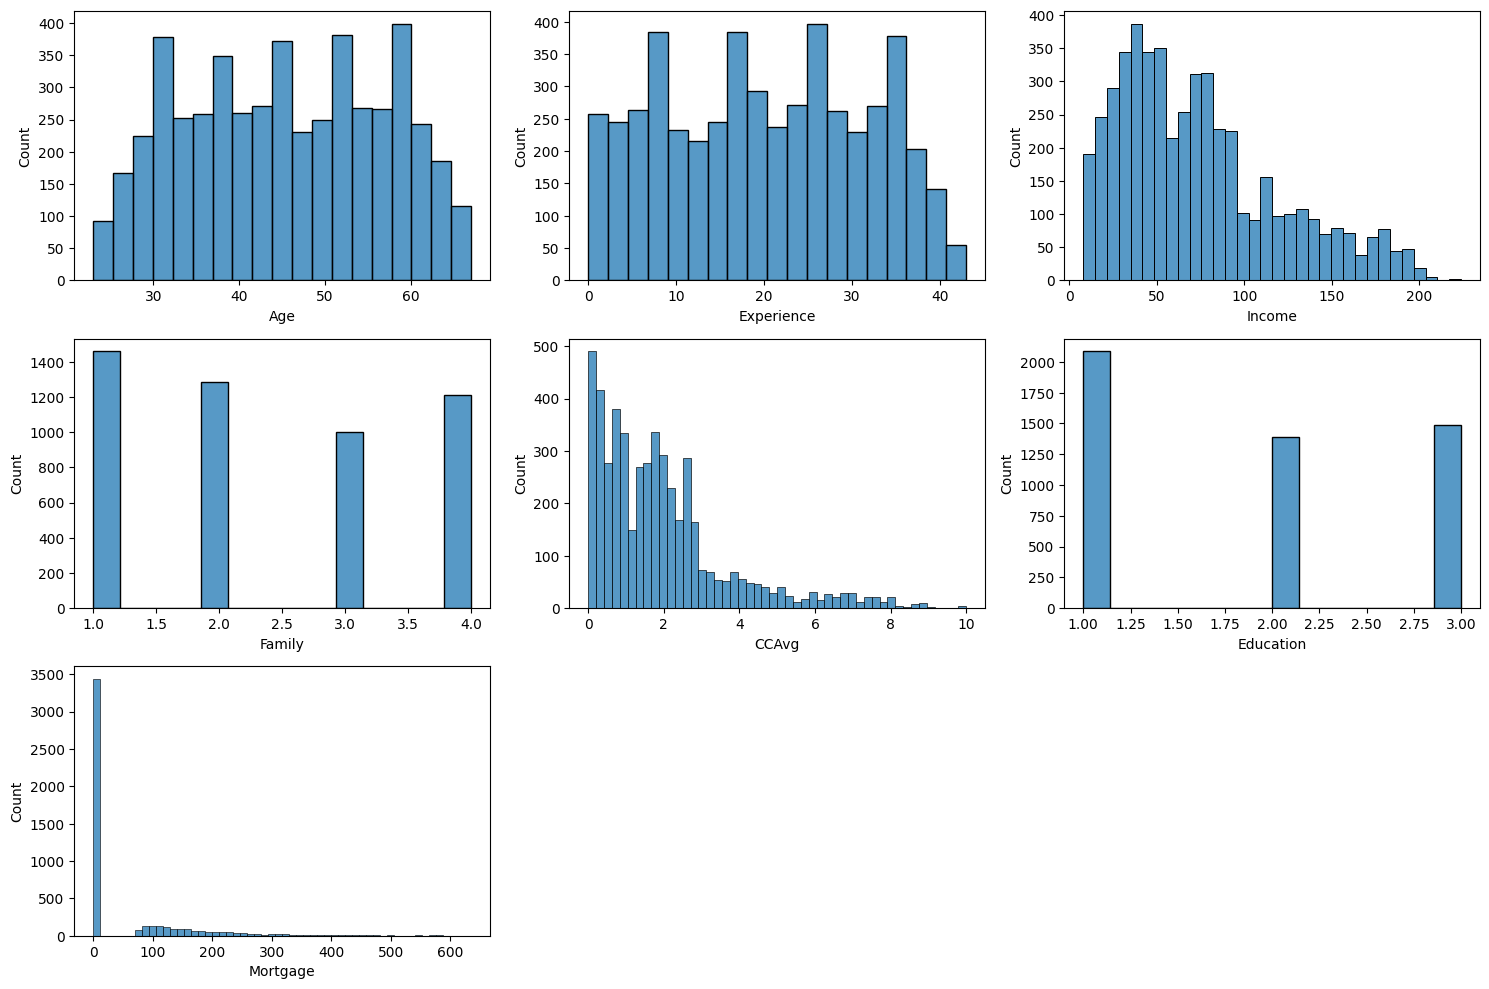

In [43]:
# Defining the figure size
plt.figure(figsize=(15,10))

# Plotting histogram for each numerical column
for i, column in enumerate(num_columns):
  plt.subplot(3,3, i+1)
  sns.histplot(data = data, x=column)

plt.tight_layout();

#### Observations:

1. Age
  * The distribution is fairly balanced with no strong skew, indicating a good spread of customers.
  * The average age is 45 years and the range is 23 years to 67 years

2. Experience:
  * The distribution is fairly spread with slight dip in higher values.
  * The average years of experience is 20 years.

3. Income:
  * The distribution is positively skewed (Right-skewed)
  * Majority of the customers earn below $100,000.

4. Family:
  * Most common family size is 1 member indicating most customers are individuals or small families.

5. CCAvg (Credit Card Average Spending):
  * The distribution is Heavily right-skewed (positively skewed).
  * Majority of the customers spend below $2700 using credit card on monthly basis.
  * Majority of customers have low credit card usage, with a few high spenders.

6. Education:
  * Most of the customers are Undergraduates.

7. Mortgage:
  * The distribution is Heavily right-skewed (positively skewed).
  * A large portion of customers have no mortgage, with a few outliers having very high values.

---

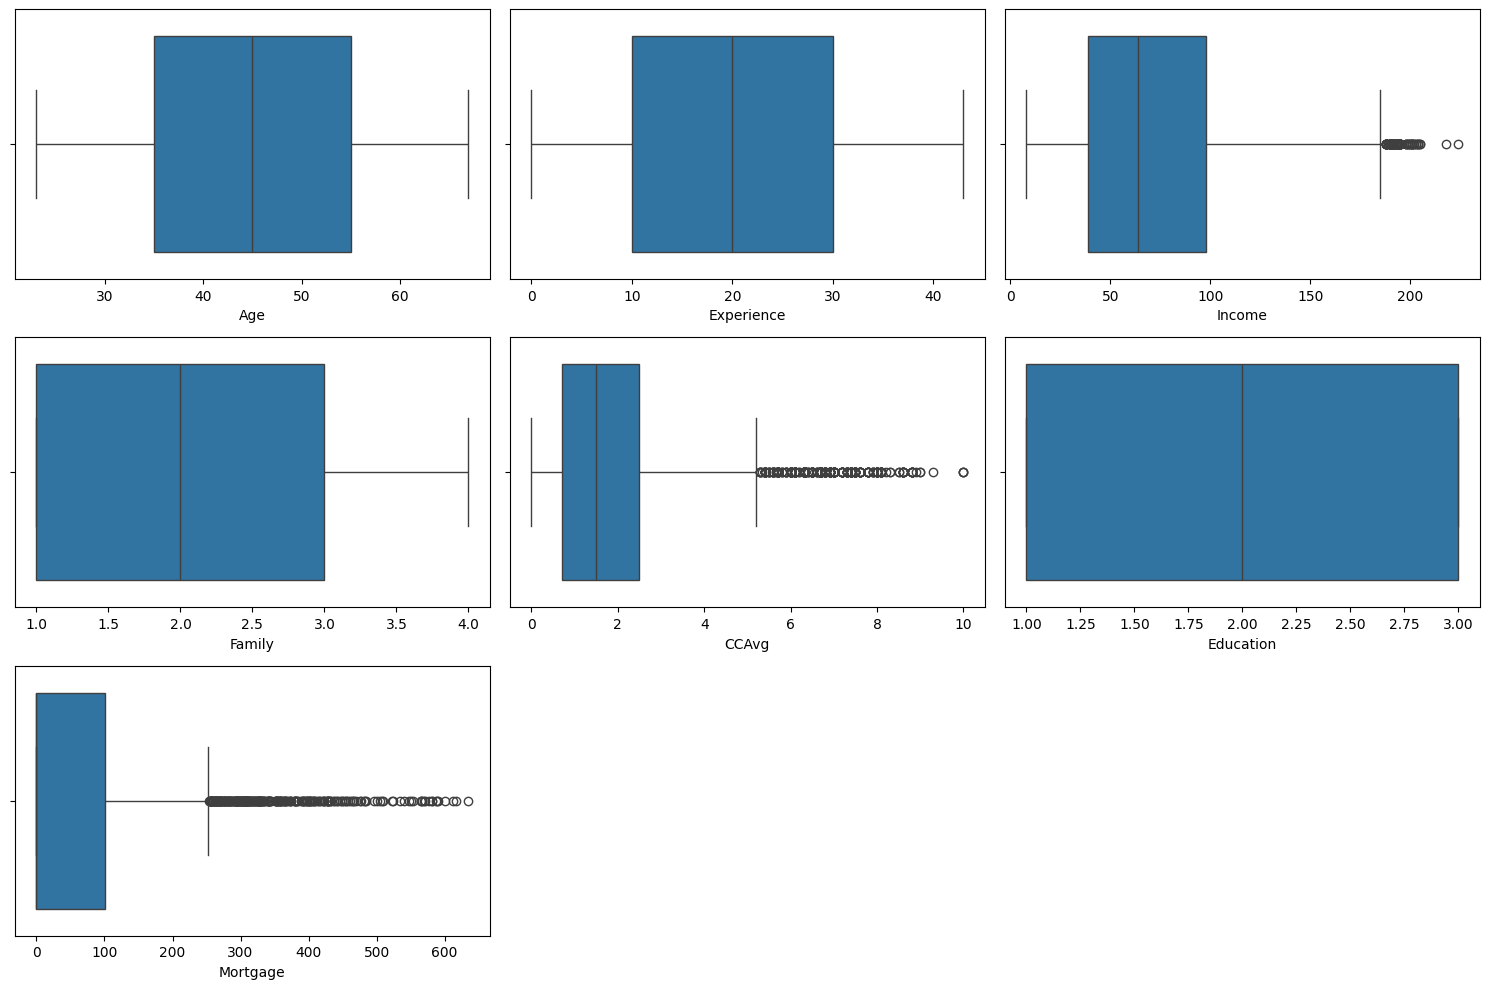

In [44]:
# Defining the figure size
plt.figure(figsize=(15,10))

# Plotting histogram for each numerical column
for i, column in enumerate(num_columns):
  plt.subplot(3,3, i+1)
  sns.boxplot(data = data, x=column)

plt.tight_layout();

#### Observations:

1. Age and Education:
  * There are no outliers.

2. Income:
  * Quite a few outliers.
  * Most customers earn under $100k.

3. CCAvg (Credit Card Spend):
  * The grapgh indicates that while the majority of customers have relatively low credit card spending, there are a few outliers with significantly higher expenditures, suggesting a highly skewed distribution.

4. Mortgage:
  * Many customers have very high mortgage amounts, and these are likely people with higher incomes who also spend more on their credit cards.

---

#### Categorical column

In [45]:
# Creating a list of top10 cities with the highest number of customers.
top_cities = data['City'].value_counts().head(10).index
top_cities

Index(['Los Angeles', 'San Diego', 'San Francisco', 'Berkeley', 'Sacramento',
       'Palo Alto', 'Stanford', 'Davis', 'La Jolla', 'Santa Barbara'],
      dtype='object', name='City')

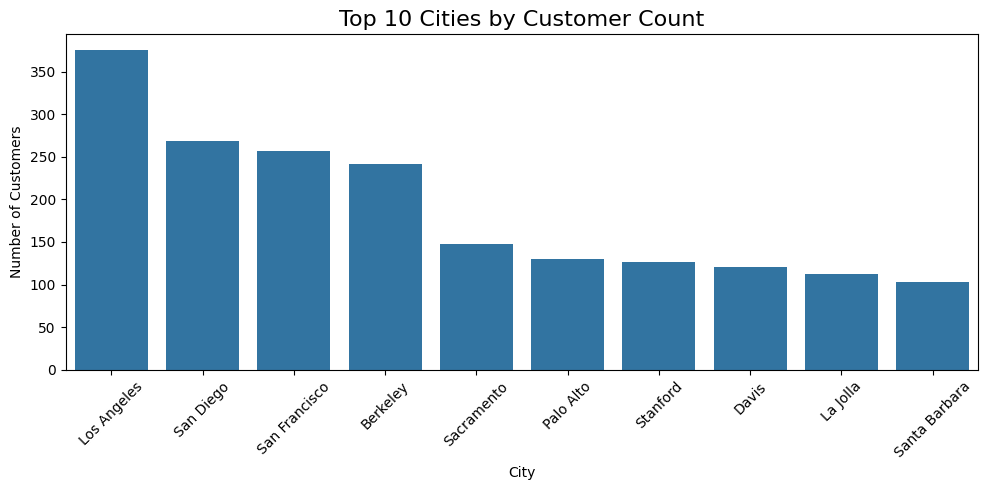

In [46]:
# Plotting Barplot of Top 10 Cities by Customer Count

plt.figure(figsize=(10,5))
sns.countplot(data=data[data['City'].isin(top_cities)], x='City', order=top_cities)
plt.xticks(rotation=45)

# Axis labels and a title for the plot
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.title('Top 10 Cities by Customer Count', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();

#### Observations:

* Los Angeles has the highest number of customers by far — over 370 — making it the most dominant city in this dataset.

* San Diego and San Francisco follow closely behind with similar customer volumes, around 270–260 customers each.

* Berkeley and Sacramento round out the top 5, showing moderate but significant customer presence.

* The remaining cities — Palo Alto, Stanford, Davis, La Jolla, and Santa Barbara — have smaller customer bases but still made it to the top 10.

---

#### Binary Columns

Personal_Loan, Securities_Account, CD_Account, Online, CreditCard

#### 1. Personal_Loan

Personal_Loan
0    90.394684
1     9.605316
Name: proportion, dtype: float64 



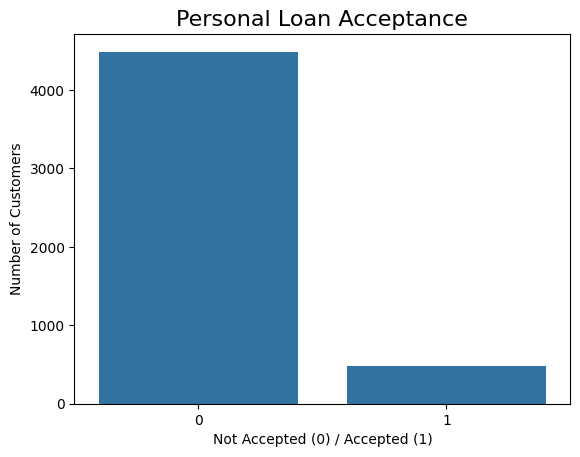

In [47]:
# checking the distribution of the categories in Personal_Loan
print(100*data['Personal_Loan'].value_counts(normalize=True), '\n')

# Plotting Barplot of count of Personal Loan Acceptance
sns.countplot(data=data, x='Personal_Loan')

# Axis labels and a title for the plot
plt.title('Personal Loan Acceptance', fontsize=16)
plt.xlabel('Not Accepted (0) / Accepted (1)')
plt.ylabel('Number of Customers')

# Show the plot
plt.show();

#### Observations:

* The plot shows that close to 9.5% of the customers accepted the personal loan from the previous campaign.

---

#### 2. Securities_Account

Securities_Account
0    89.589207
1    10.410793
Name: proportion, dtype: float64 



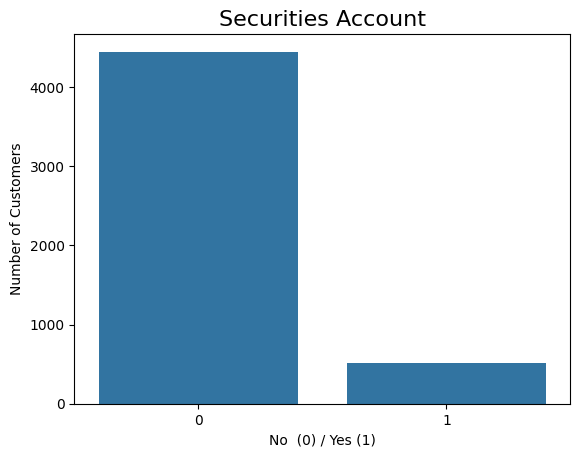

In [48]:
# Checking the percentage distribution of customers with and without a Securities Account
print(100*data['Securities_Account'].value_counts(normalize=True), '\n')

# Plotting Barplot of count of Securities Account
sns.countplot(data=data, x='Securities_Account')

# Axis labels and a title for the plot
plt.title('Securities Account', fontsize=16)
plt.xlabel('No  (0) / Yes (1)')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

#### Observations:

* Only 10.41% of the customers have Securities Account.

---

#### 3. CD_Account

CD_Account
0    93.918647
1     6.081353
Name: proportion, dtype: float64 



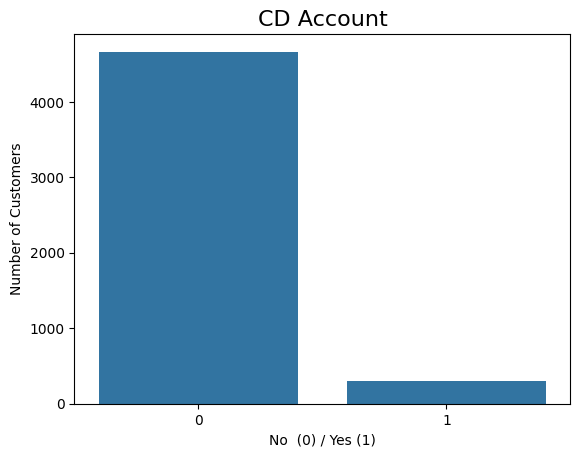

In [49]:
# Checking the percentage distribution of customers with and without a CD (Certificate of Deposit) Account
print(100*data['CD_Account'].value_counts(normalize=True), '\n')

# Plotting Barplot of count of CD Account
sns.countplot(data=data, x='CD_Account')

# Axis labels and a title for the plot
plt.title('CD Account', fontsize=16)
plt.xlabel('No  (0) / Yes (1)')
plt.ylabel('Number of Customers')

# Show the plot
plt.show;

#### Observations:

* 6.08% of the customers have Certificate of Deposit Account in the bank.

---

#### 4. Online

Online
1    59.685864
0    40.314136
Name: proportion, dtype: float64 



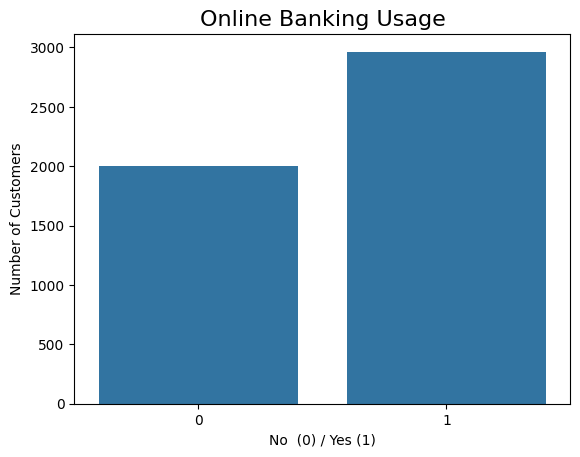

In [50]:
# checking the distribution of the categories in Online
print(100*data['Online'].value_counts(normalize=True), '\n')

# Plotting Barplot of count of Online bankng usage
sns.countplot(data=data, x='Online')

# Axis labels and a title for the plot
plt.title('Online Banking Usage', fontsize=16)
plt.xlabel('No  (0) / Yes (1)')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

#### Observations:

* More than 59% of the customers are using the internet banking facility.

---

#### 5. CreditCard

CreditCard
0    70.640354
1    29.359646
Name: proportion, dtype: float64 



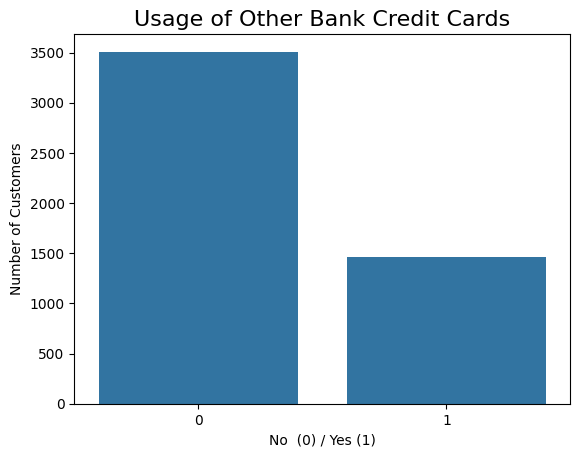

In [51]:
# Checking the percentage distribution of customers using credit cards from other banks
print(100*data['CreditCard'].value_counts(normalize=True), '\n')

# Plotting Barplot of count of CreditCard
sns.countplot(data=data, x='CreditCard')

# Axis labels and a title for the plot
plt.title('Usage of Other Bank Credit Cards', fontsize=16)
plt.xlabel('No  (0) / Yes (1)')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

#### Observations:

* From the plot we can see that almost 29% of the customers are using credit card from other banks.

* This opens up an opportunity for the bank to promote its own credit card offerings to existing customers.

---

### Bivariate Analysis

In [52]:
data.head(4)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco


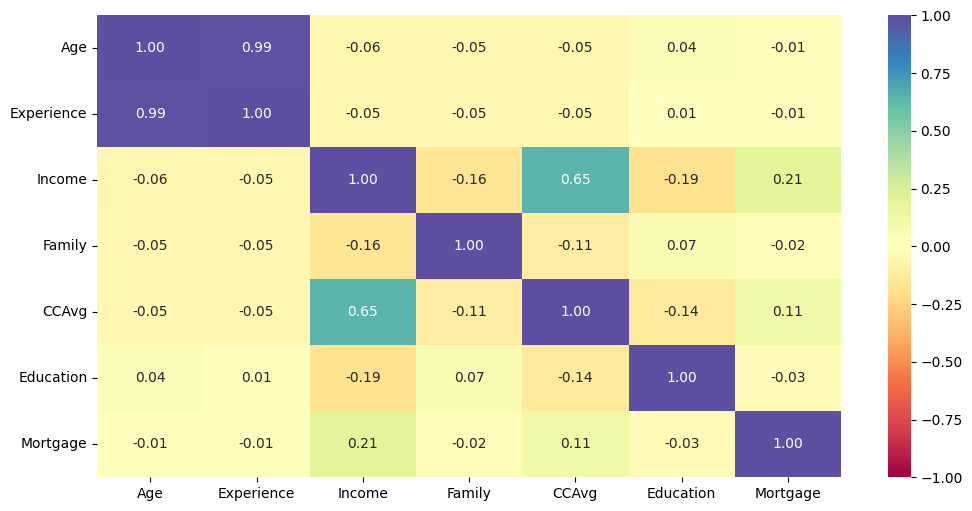

In [53]:
# Defining the size of the plot
plt.figure(figsize=(12, 6))

# Plotting the heatmap for correlation
sns.heatmap(data[num_columns].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

#### Observations:

* Age and Experience: There is a very strong positive correlation (0.99) between age and experience. This is expected, as older individuals typically have more work experience.

* Income and Family: The correlation between income and family size is weak (-0.16), suggesting that family size does not have a strong impact on income.

* Income and CCAvg: They are slightly correlated (0.65), as income increases, people may tend to spend more on their credit cards.

* Mortgage and Income: Mortgage has weak positive correlations with income (0.21), indicating that people with higher income are slightly more likely to have a mortgage.

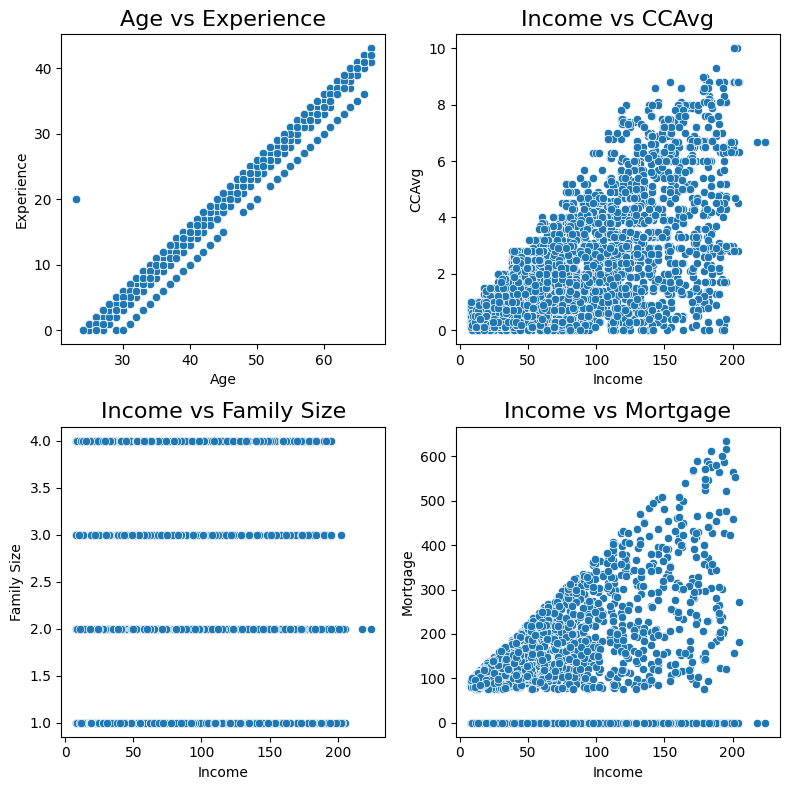

In [54]:
# # Scatter plots for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Scatter plot for Age vs Experience
sns.scatterplot(x=data['Age'], y=data['Experience'], ax=axes[0, 0])
axes[0, 0].set_title('Age vs Experience', fontsize=16)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Experience')

# Scatter plot for Income vs CCAvg
sns.scatterplot(x=data['Income'], y=data['CCAvg'], ax=axes[0, 1])
axes[0, 1].set_title('Income vs CCAvg', fontsize=16)
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('CCAvg')

# Scatter plot for Income vs Family
sns.scatterplot(x=data['Income'], y=data['Family'], ax=axes[1, 0])
axes[1, 0].set_title('Income vs Family Size', fontsize=16)
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Family Size')

# Scatter plot for Income vs Mortgage
sns.scatterplot(x=data['Income'], y=data['Mortgage'], ax=axes[1, 1])
axes[1, 1].set_title('Income vs Mortgage', fontsize=16)
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Mortgage')

# Display the plots
plt.tight_layout()
plt.show()

#### Observations:

* Age vs Experience: The strong positive correlation (0.99) is clearly reflected, with most points lying along a diagonal, showing that older individuals generally have more years of experience.

* Income vs CCAvg: There’s a noticeable upward trend, indicating that as income increases, so does credit card spending (CCAvg), in line with the correlation of 0.65.

* Income vs Family Size: There is no clear pattern here, which aligns with the weak negative correlation (-0.16) observed in the correlation matrix.

* Income vs Mortgage: There is a slight positive trend, suggesting that as income increases, people are more likely to have a mortgage, which corresponds with the weak positive correlation (0.21).

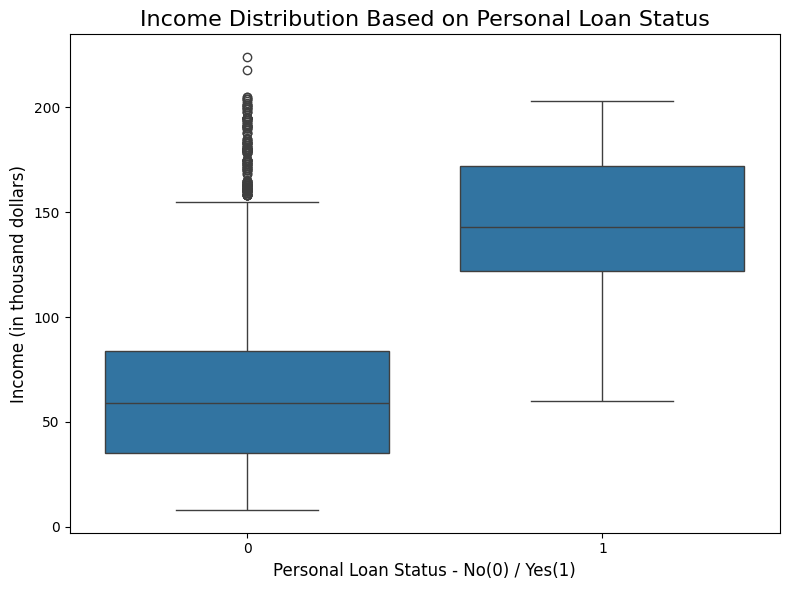

In [55]:
# Income vs Personal Loan (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Income')


# Axis labels and a title for the plot
plt.title('Income Distribution Based on Personal Loan Status', fontsize=16)
plt.xlabel('Personal Loan Status - No(0) / Yes(1)', fontsize=12)
plt.ylabel('Income (in thousand dollars)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:

* The median income for individuals without a personal loan is relatively lower, with the middle line of the box near the 50-55k range.

* There are a significant number of outliers at the higher end of the income distribution, suggesting some individuals without a personal loan earn significantly more than others in this group.

* The median income for individuals who have a personal loan is higher, typically in the 60-65k range.

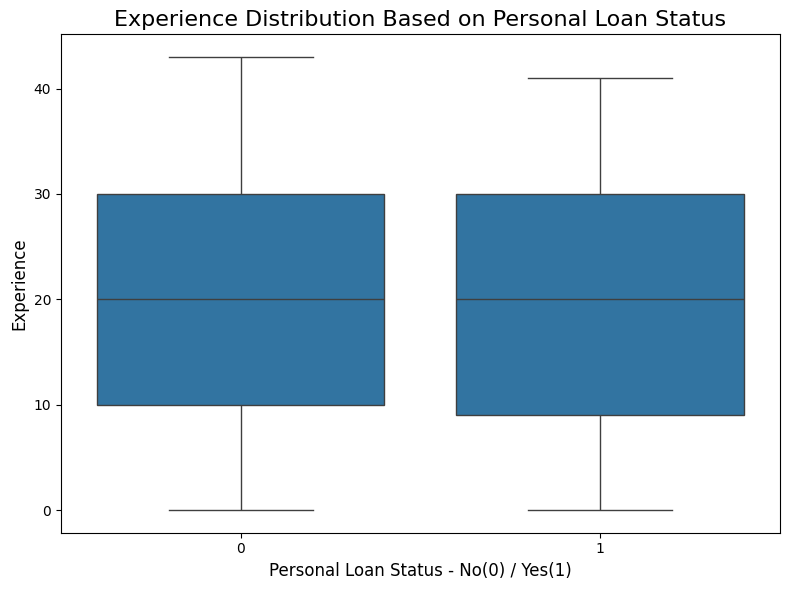

In [56]:
# Experience vs Personal Loan (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Experience')


# Axis labels and a title for the plot
plt.title('Experience Distribution Based on Personal Loan Status', fontsize=16)
plt.xlabel('Personal Loan Status - No(0) / Yes(1)', fontsize=12)
plt.ylabel('Experience', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:

* The overall median experience appears quite similar for both loan and non-loan holders.

* The spread (IQR) of experience is similar for both groups, suggesting that experience does not significantly vary with personal loan status.

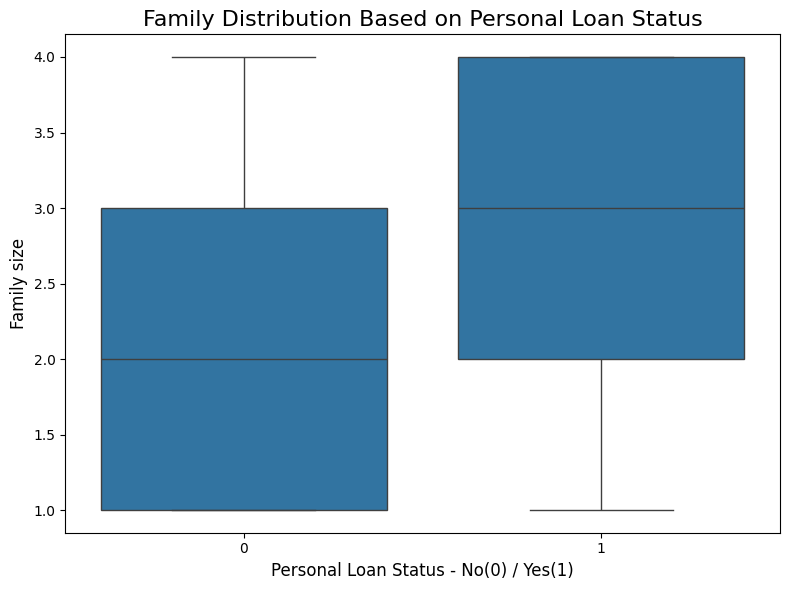

In [57]:
# Family vs Personal Loan (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Family')


# Axis labels and a title for the plot
plt.title('Family Distribution Based on Personal Loan Status', fontsize=16)
plt.xlabel('Personal Loan Status - No(0) / Yes(1)', fontsize=12)
plt.ylabel('Family size', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:

* Customers with a personal loan tend to have larger families compared to those without a loan. The median family size for those with loans is slightly higher (around 3 members) than for those without loans (around 2 members).

* Family size might influence the decision to take a personal loan, with people having larger families potentially seeking personal loans.

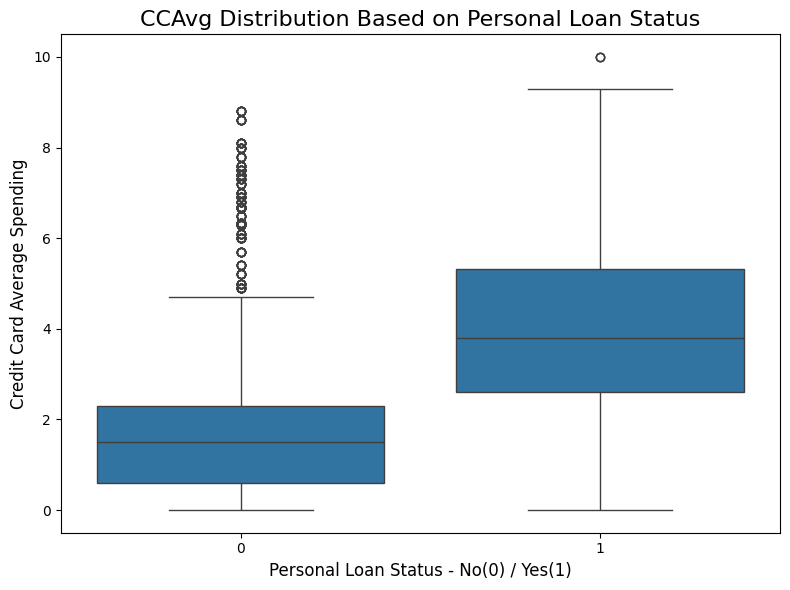

In [58]:
# CCAvg vs Personal Loan (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Personal_Loan', y='CCAvg')


# Axis labels and a title for the plot
plt.title('CCAvg Distribution Based on Personal Loan Status', fontsize=16)
plt.xlabel('Personal Loan Status - No(0) / Yes(1)', fontsize=12)
plt.ylabel('Credit Card Average Spending', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:

* Loan holders have a higher median credit card spending than non-loan holders.

* Credit card spending is higher among those who have a personal loan.

* Outliers are more common for the non-loan group, indicating a few high credit card spenders who do not have personal loans.

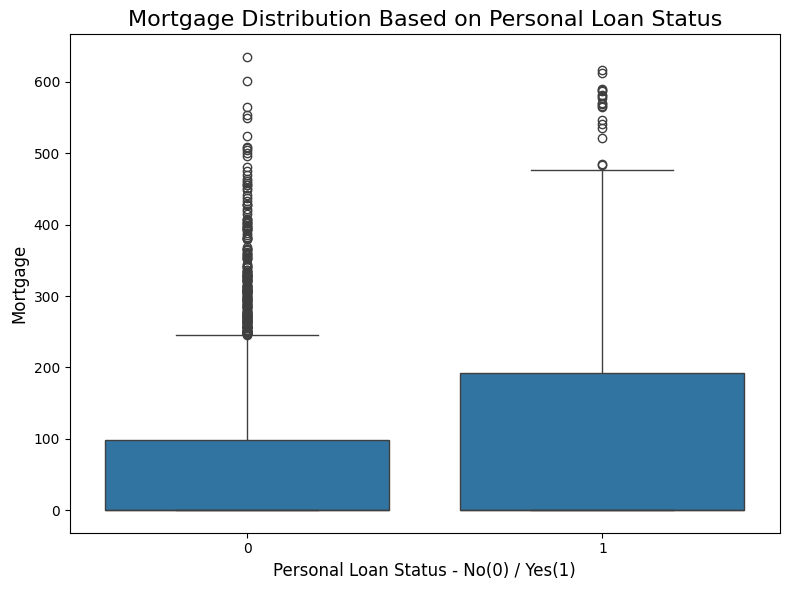

In [59]:
# Mortgage vs Personal Loan (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Mortgage')


# Axis labels and a title for the plot
plt.title('Mortgage Distribution Based on Personal Loan Status', fontsize=16)
plt.xlabel('Personal Loan Status - No(0) / Yes(1)', fontsize=12)
plt.ylabel('Mortgage', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:

* People with personal loans seem to have slightly higher mortgage amounts on average.

* Individuals with a personal loan generally have a slightly higher median mortgage amount compared to those without a loan.

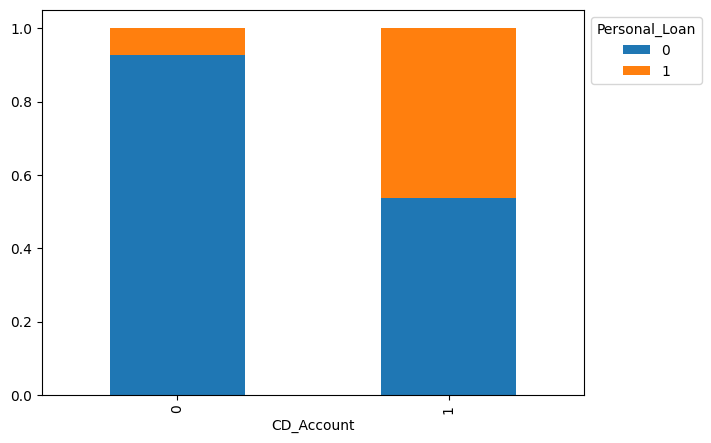

In [60]:
# Create the crosstab for Personal_Loan vs CD_Account
tab = pd.crosstab(
    data['CD_Account'],
    data['Personal_Loan'],
    normalize='index')

# Sorting the crosstab by the proportion of '0' (No) in Personal_Loan
tab = tab.sort_values(by=0, ascending=False)

# Plot the stacked bar chart
tab.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('CD_Account')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Personal_Loan')

# Show the plot
plt.show()

#### Observations:

* CD Account holders are more likely to have a personal loan compared to individuals without a CD account.

* The majority of individuals without a CD Account do not have Personal Loan.

* The individuals with a CD Account, the proportion of loan holders (orange) is much higher compared to the group without a CD account.

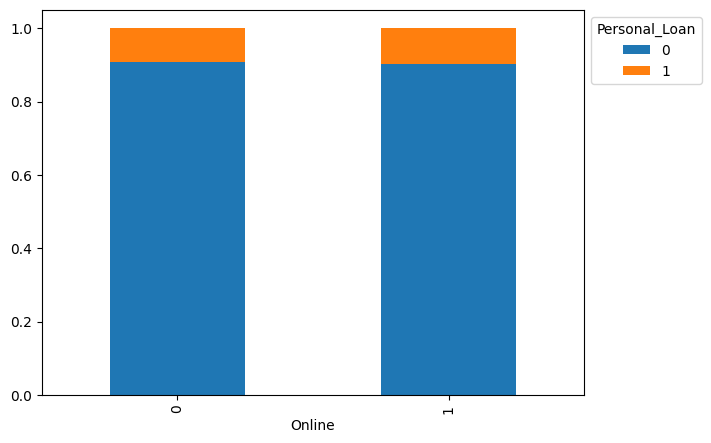

In [61]:
# Create the crosstab for Personal_Loan vs Online
tab = pd.crosstab(
    data['Online'],
    data['Personal_Loan'],
    normalize='index')

# Sorting the crosstab by the proportion of '0' (No) in Personal_Loan
tab = tab.sort_values(by=0, ascending=False)

# Plot the stacked bar chart
tab.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('Online')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Personal_Loan')

# Show the plot
plt.show()

#### Observations:

* The overall proportion of loan holders is low in both groups, suggesting that having an online account does not significantly increase the likelihood of having a personal loan

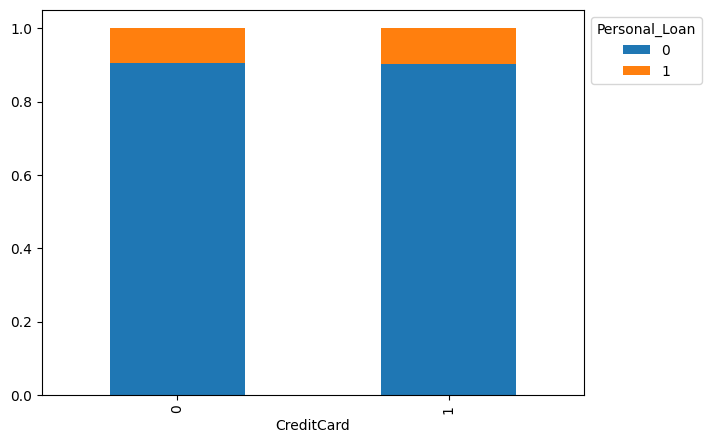

In [62]:
# Create the crosstab for Personal_Loan vs CreditCard
tab = pd.crosstab(
    data['CreditCard'],
    data['Personal_Loan'],
    normalize='index')

# Sorting the crosstab by the proportion of '0' (No) in Personal_Loan
tab = tab.sort_values(by=0, ascending=False)

# Plot the stacked bar chart
tab.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('CreditCard')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Personal_Loan')

# Show the plot
plt.show()

#### Observations:

* Credit card holders are only slightly more likely to have a personal loan, but the difference is not significant.

In [63]:
data.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles


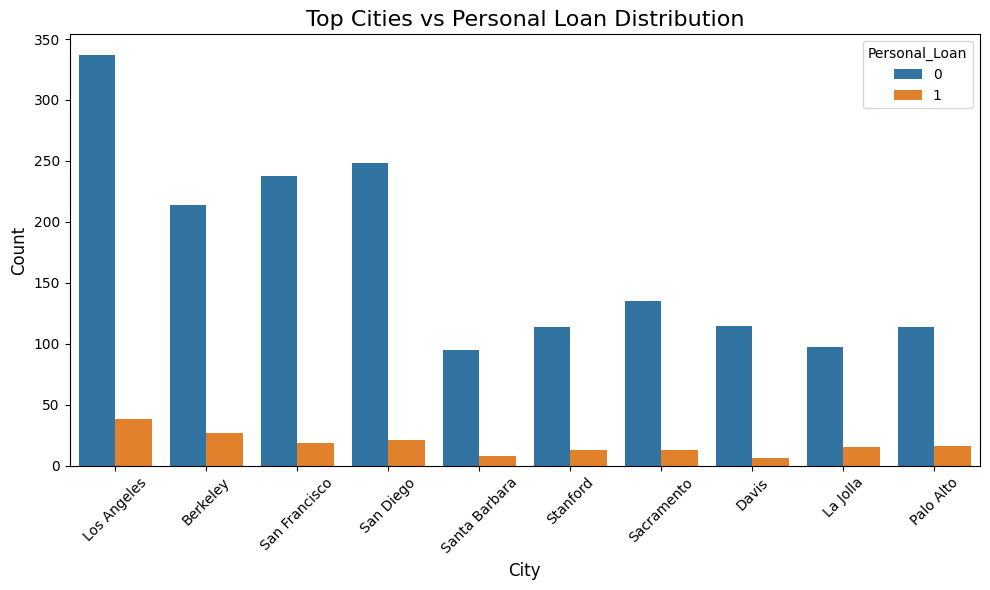

In [64]:
# Filter the dataset to include only the top 10 cities
filtered_data = data[data['City'].isin(top_cities)]

# Create the countplot for City and Personal Loan with the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='City', hue='Personal_Loan')

# Add title and labels
plt.title('Top Cities vs Personal Loan Distribution', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:

* For most cities, the proportion of individuals with a personal loan is relatively low compared to those without a loan

* Los Angeles stands out as the city with the largest number of individuals, but the proportion of personal loan holders is lower compared to other cities.

* Smaller cities like Stanford, Palo Alto, and La Jolla show a higher proportion of loan holders.

# **Data Preparation for Modeling**

Since City doesn't appear to significantly affect Personal_Loan, I would proceed by dropping the City column from the explanatory variables 'x' to avoid adding unnecessary noise to the model.

In [65]:
# Defining the explanatory (independent) and response (dependent) variable
x = data.drop(['Personal_Loan', 'City'], axis=1)
y = data['Personal_Loan']

In [66]:
# Specify datatype of independent variable
x = x.astype(float)

In [67]:
# Splitting the data in 80:20 ratio for train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, stratify= y, random_state = 42)

In [68]:
# Printing the shape of the training and test sets
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape, '\n')

# Printing the percentage of classes in the training set
print("Percentage of Personal Loan classes in Training set:")
print(100*y_train.value_counts(normalize=True),'\n')

# Printing the percentage of classes in the test set
print("Percentage of Personal Loan classes in Test set:")
print(100*y_test.value_counts(normalize=True))

Shape of Training set :  (3972, 11)
Shape of Test set :  (994, 11) 

Percentage of Personal Loan classes in Training set:
Personal_Loan
0    90.382679
1     9.617321
Name: proportion, dtype: float64 

Percentage of Personal Loan classes in Test set:
Personal_Loan
0    90.442656
1     9.557344
Name: proportion, dtype: float64


# **Model Building**

## Decision Tree (dtree1)

In [69]:
# Creating an instance of decision tree model
dtree1 = DecisionTreeClassifier(random_state = 42)

# Fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [87]:
# Defining function to compute different metrics to check performance of classification model built using sklearn

def model_performance_classification (model, predictors, target):

  # Predicting using independent variable
  pred = model.predict(predictors)

  # Computer Accuracy, Recall, Precision & F1 Score
  acc = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  # Creating dataframe of metrics
  df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
  return df_perf

In [79]:
# Creating function for confusion matrix

def plot_confusion_matrix (model, predictors, target):

  # Predict target values using the model and pedictors
  y_pred = model.predict(predictors)

  # Compute confusion matrix comparing the true target values with predicted values
  cm = confusion_matrix(target, y_pred)

  # Creating labels for each cell in the confusion matrix with both count and percentage
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2,2)

  #Figure size for plot
  plt.figure(figsize = (6,4))

  # Plot confusion matrix as heatmap
  sns.heatmap(cm, annot = labels, fmt = "")
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

Given that the dataset for Personal Loan Acceptance is likely imbalanced, the F1-score is the most appropriate metric to focus on. It strikes a balance between precision and recall, making it ideal for cases where both false positives and false negatives need to be minimized.

**Training Set Data**

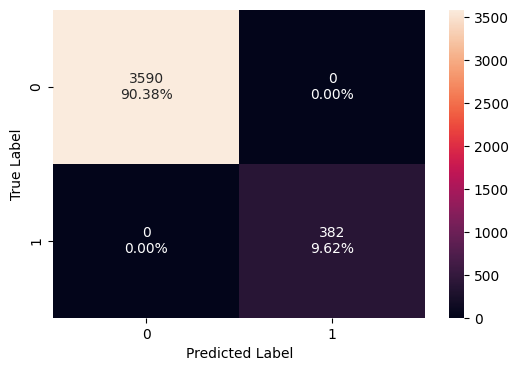

In [80]:
# To plot confusion matrix
plot_confusion_matrix(dtree1, X_train, y_train)

In [89]:
# Training set performance
dtree1_train_perf = model_performance_classification(dtree1, X_train, y_train)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Test Set Data**

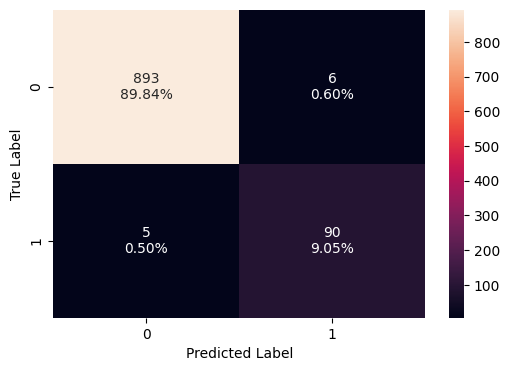

In [90]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [91]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.988934,0.947368,0.9375,0.942408


#### Observations:

**Training Set Metrics:**

* Accuracy, Recall, Precision, and F1 Score are all 1.0, which indicates that the model performed flawlessly on the training set.

* It seems like a sign of overfitting, especially if the performance is too good to be true. It suggests that the model has potentially memorized the training data

**Test Set Metrics:**

* Accuracy is still quite high at 98.89%, Recall (94.74%) and Precision (93.75%) are also strong, showing that the model can effectively identify loan acceptors.

* The F1 Score (94.24%) is also very good, indicating that the model maintains a strong balance between precision and recall on the test set.

**Interpretation:**

* Although the model performs well on the test set, indicating good generalization, the perfect metrics on the training set suggest some potential overfitting. If the model's performance drops significantly on new, unseen data, this could become a concern. Therefore, I plan to proceed with pre-pruning and post-pruning the decision tree to control overfitting and compare the performance.

### Visualizing the Decision Tree

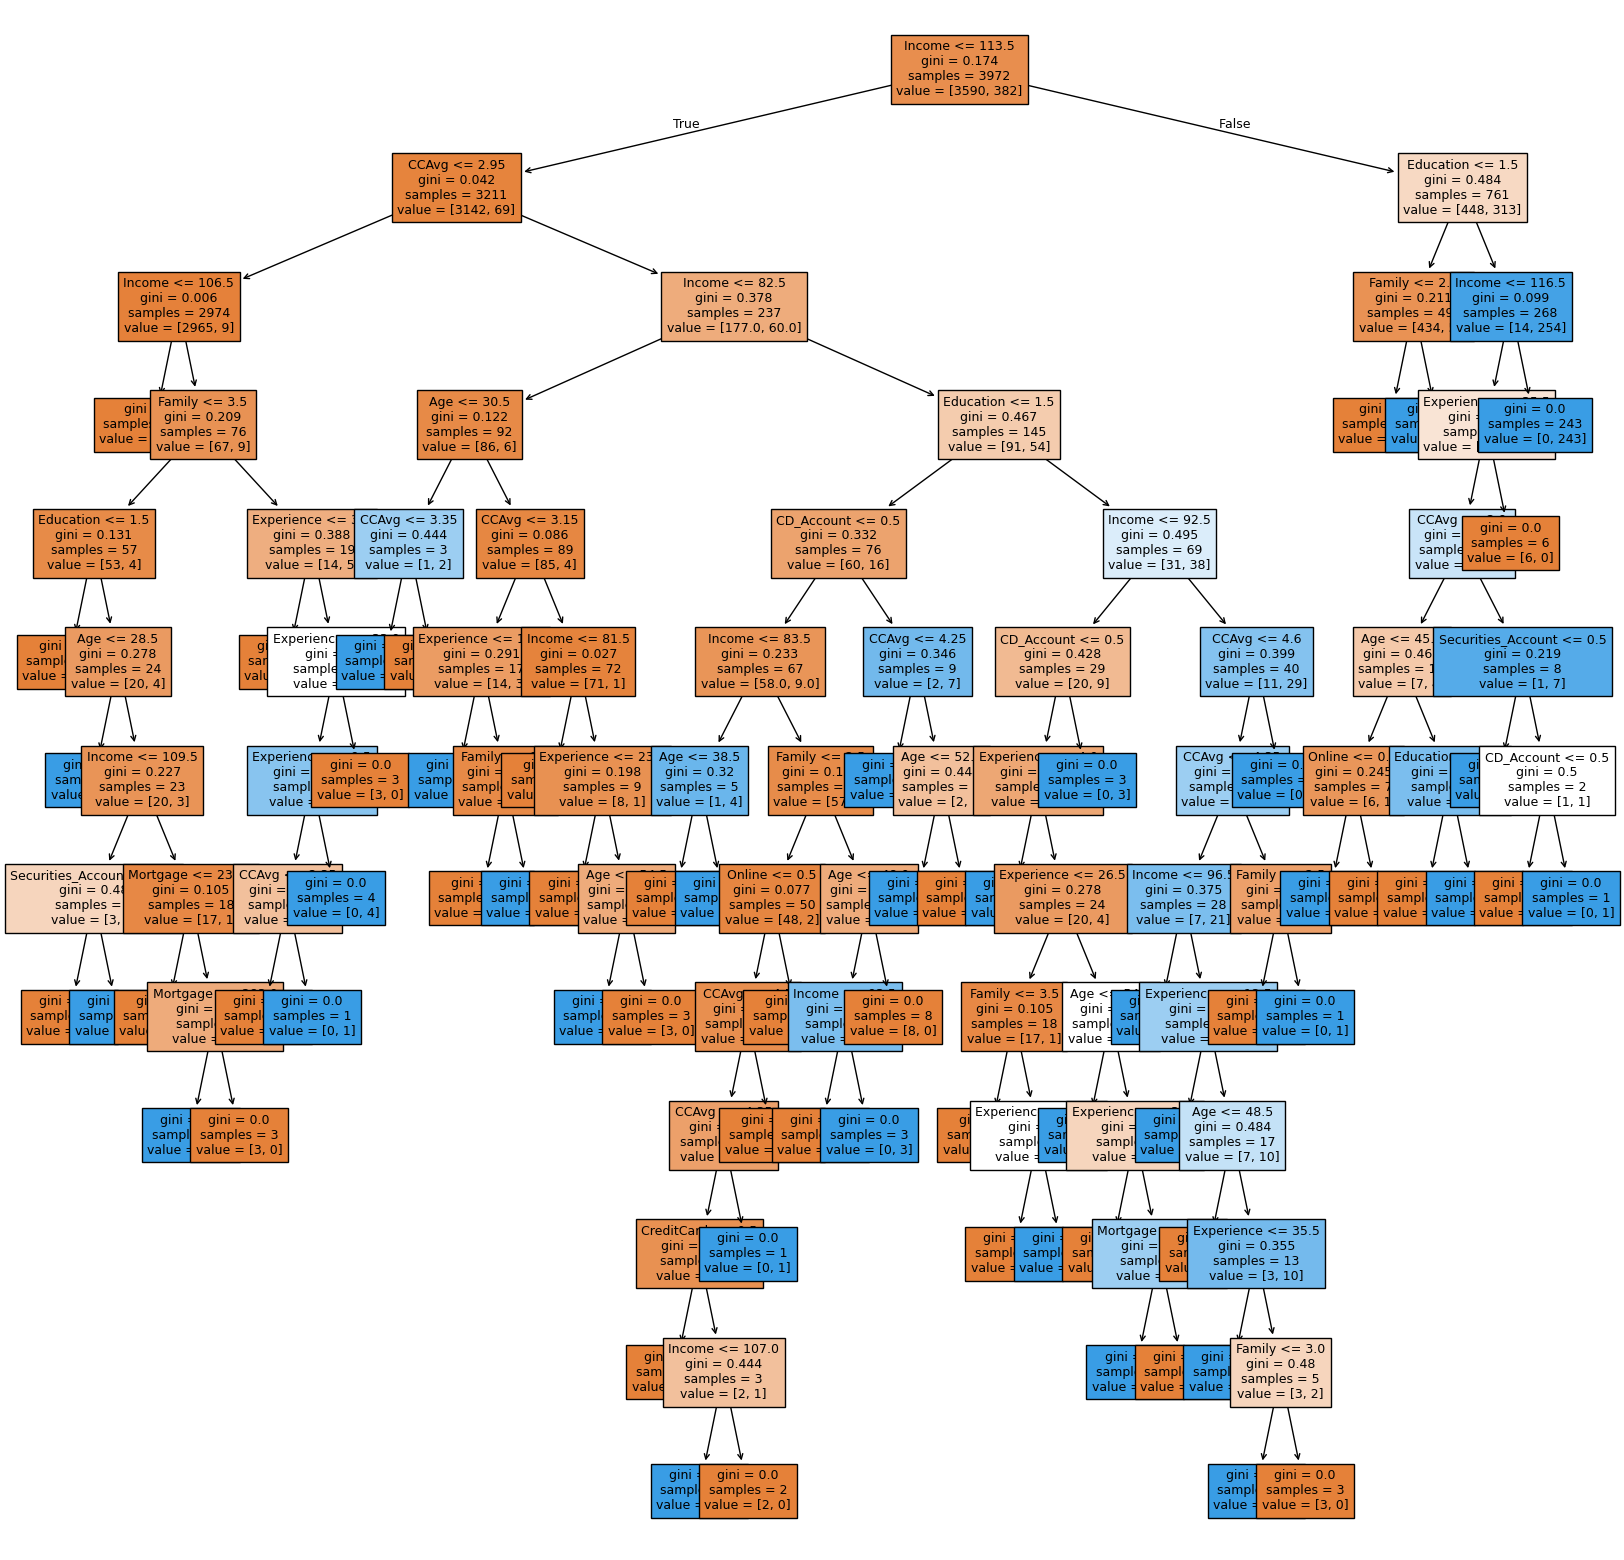

In [92]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

# Show the plot
plt.show()

In [93]:
# printing a text report showing the rules of tree
print(
    tree.export_text(
        dtree1,
        feature_names=feature_names,
        show_weights=True
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2898.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [33.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Income <= 109.50
|   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- Income >  109.50
|   |   |   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Mortgage >  231.00
|   |   |   |   |   

The root node splits based on Income <= 1115, which appears to be an important factor in predicting the target variable (Personal Loan Acceptance). This suggests that income is a significant predictor in determining whether someone will accept a loan.

---

## Decision Tree: Pre-pruning (dtree2)

In [94]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameters
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calc F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [95]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

### Model Evaluation

**Training Set Data**

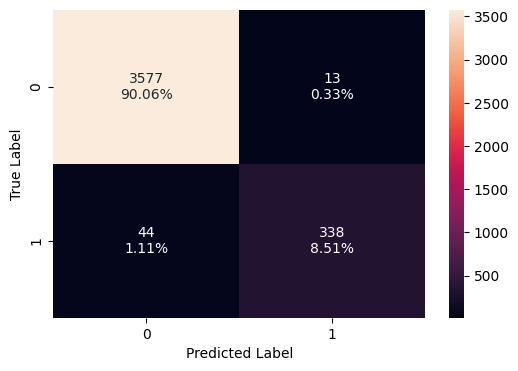

In [96]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [97]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.98565,0.884817,0.962963,0.922237


**Test Set Data**

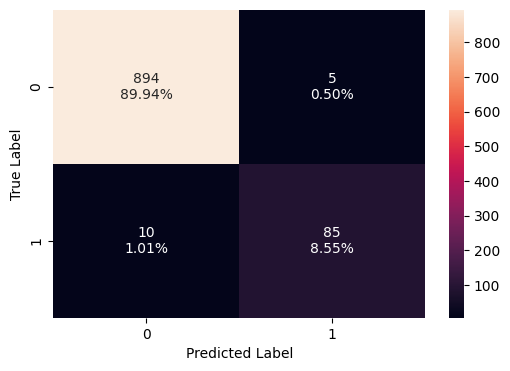

In [98]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [99]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.984909,0.894737,0.944444,0.918919


#### Observations:

**Training Set Metrics:**

* In the training set the model achieves 98.57% accuracy, with a precision of 96.30% and a recall of 88.48% for the Personal Loan Acceptance class.

* The F1 score of 92.22% indicates a good balance between precision and recall.

**Test Set Metrics:**

* The model maintains 98.49% accuracy on the test set, with precision of 94.44% and recall of 89.47% for loan acceptors.

* The F1 score of 91.89% indicates strong performance, closely matching the training set.

**Interpretation:**

* The model performs well on both the training and test sets, indicating it generalizes well and has avoided overfitting.

### Visualizing the Decision Tree

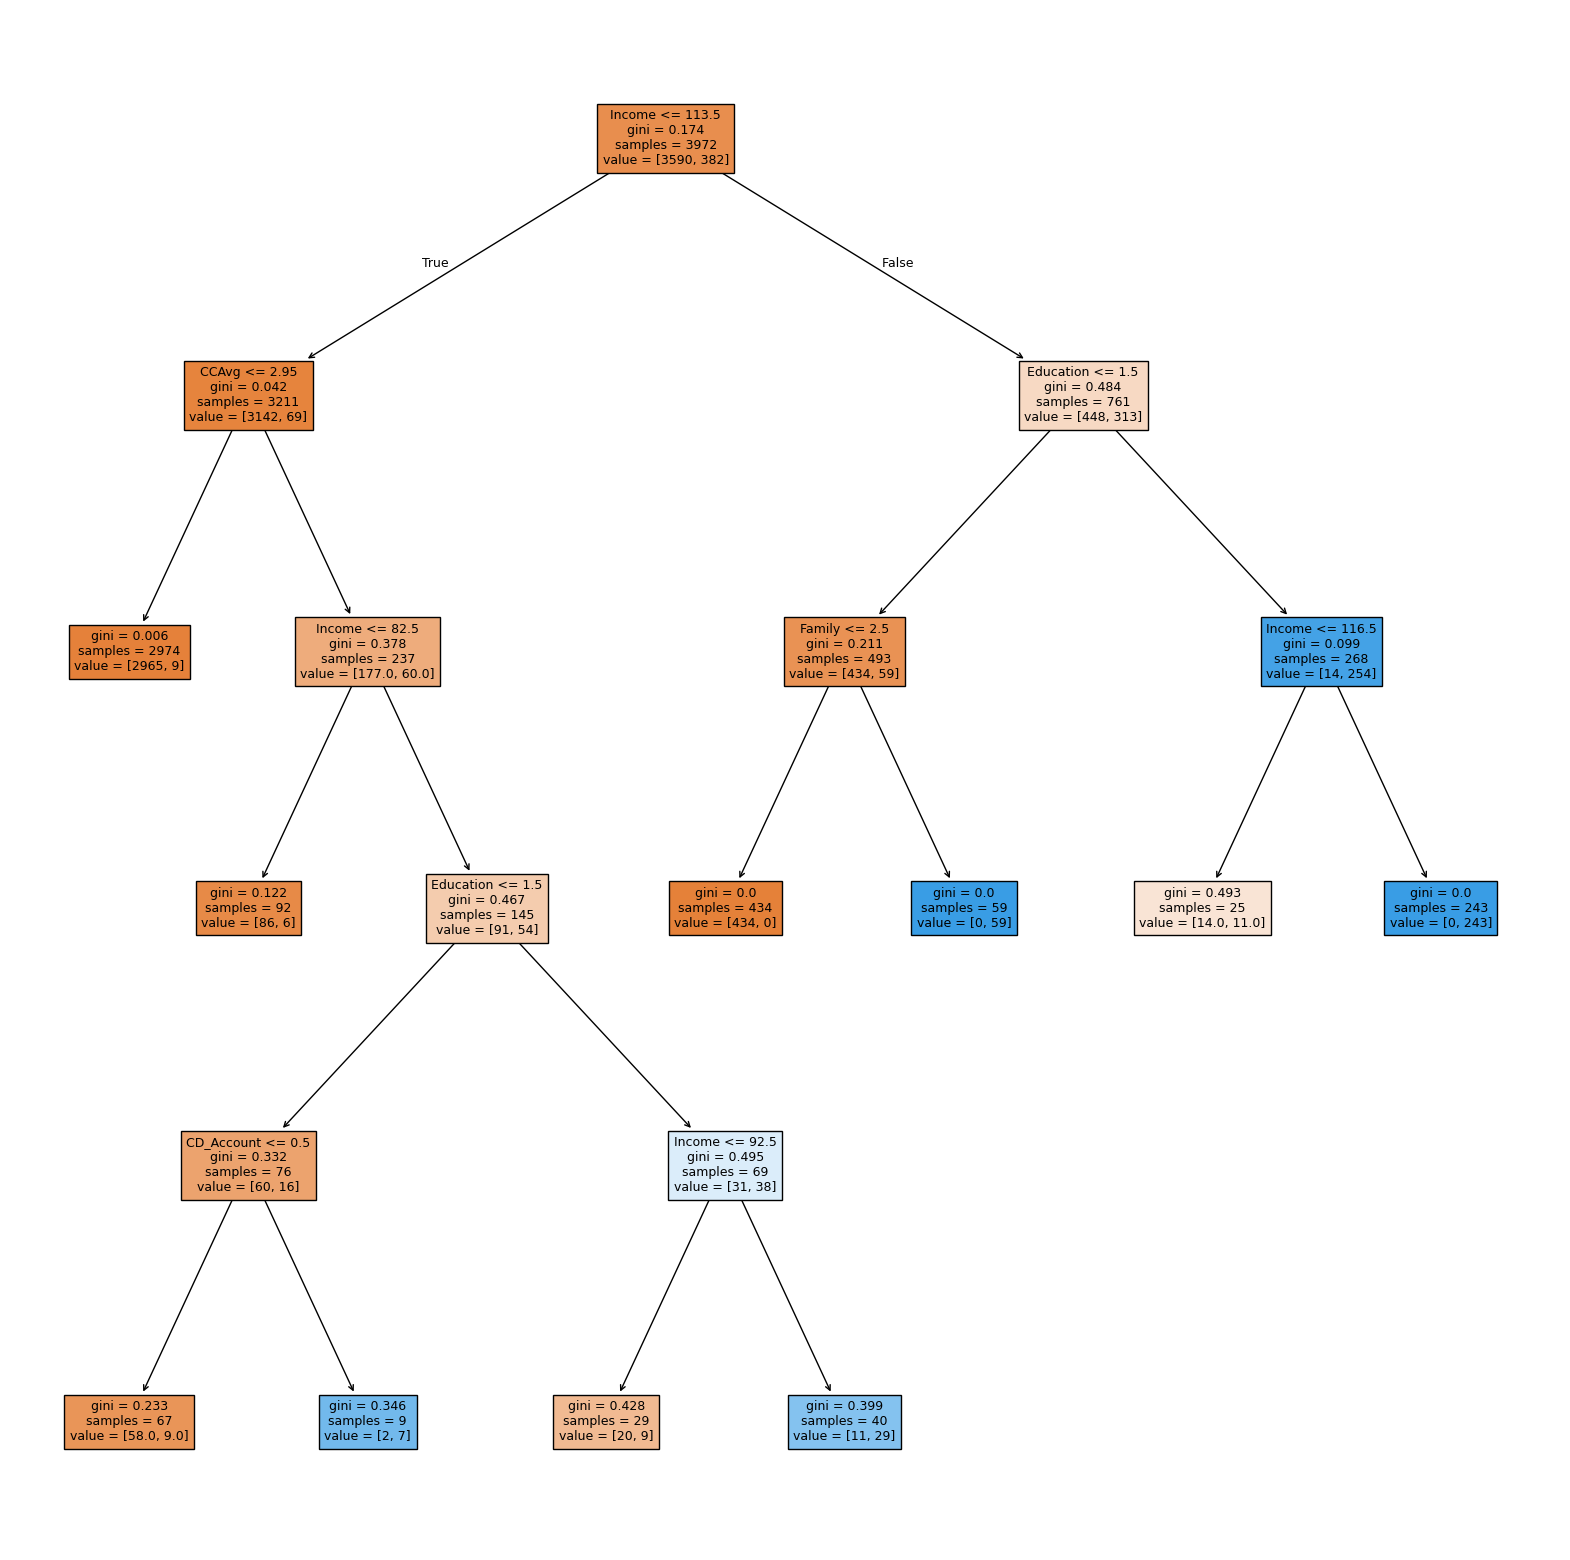

In [100]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

# Show the plot
plt.show()

In [102]:
# printing a text report showing the rules of tree
print(
    tree.export_text(
        dtree2,
        feature_names=feature_names,
        show_weights=True
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2965.00, 9.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- weights: [86.00, 6.00] class: 0
|   |   |--- Income >  82.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [58.00, 9.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Income <= 92.50
|   |   |   |   |   |--- weights: [20.00, 9.00] class: 0
|   |   |   |   |--- Income >  92.50
|   |   |   |   |   |--- weights: [11.00, 29.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [434.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 59.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [14.00, 11.00] class: 0
|   |   |--- In

The pre-pruning process helped limit the tree's complexity, resulting in a simplified tree with fewer splits. This helps reduce the risk of overfitting and ensures the model focuses on key features.

---

## Decision Tree: Post-pruning (dtree3)

In [103]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [104]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000166,0.000497
2,0.000193,0.001463
3,0.000220,0.001904
4,0.000238,0.002379
5,0.000238,0.002855
6,0.000252,0.003610
7,0.000336,0.003946
8,0.000336,0.004282
9,0.000336,0.004617


Train decision tree using the effective alphas.

In [105]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.05350874715641242


Will remove the last element in clfs and ccp_alphas as it corresponds to a trivial tree with only one node.

In [106]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [107]:
train_f1_scores = []

# Iterate through each decision tree
for clf in clfs:
    # Predict labels for the training set
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [108]:
test_f1_scores = []

# Iterate through each decision tree
for clf in clfs:
    # Predict labels for the test set
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


In [110]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00025176233635448137),
                       random_state=42)


### Model Evaluation

**Training Set Data**

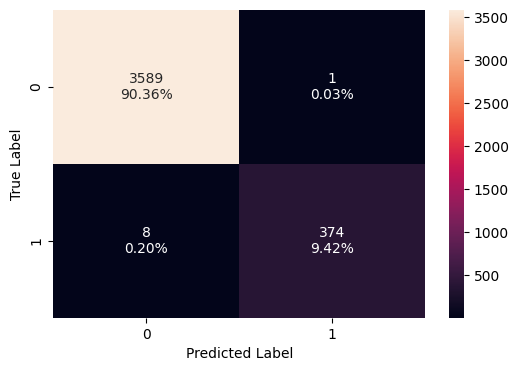

In [111]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [112]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.997734,0.979058,0.997333,0.988111


**Test Set Data**

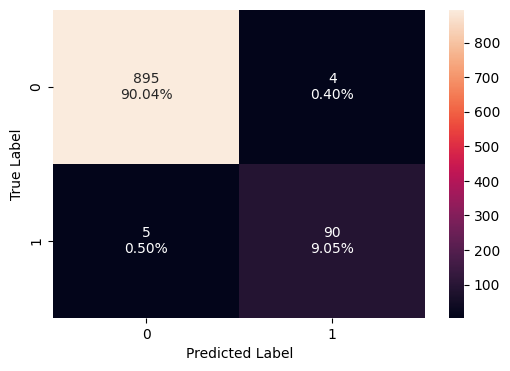

In [113]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [114]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.990946,0.947368,0.957447,0.952381


#### Observations:

**Training Set Metrics:**

* The model performs exceptionally well on the training set with high accuracy, recall, precision, and F1 score, indicating strong performance in both identifying loan acceptors and minimizing false positives.

**Test Set Metrics:**

* The model performs well on the test set, with only a small decrease in metrics compared to the training set, indicating it generalizes well.

**Interpretation:**

* The post-pruned decision tree shows strong performance on both the training and test sets, indicating effective generalization and avoidance of overfitting.

### Visualizing Decision Tree

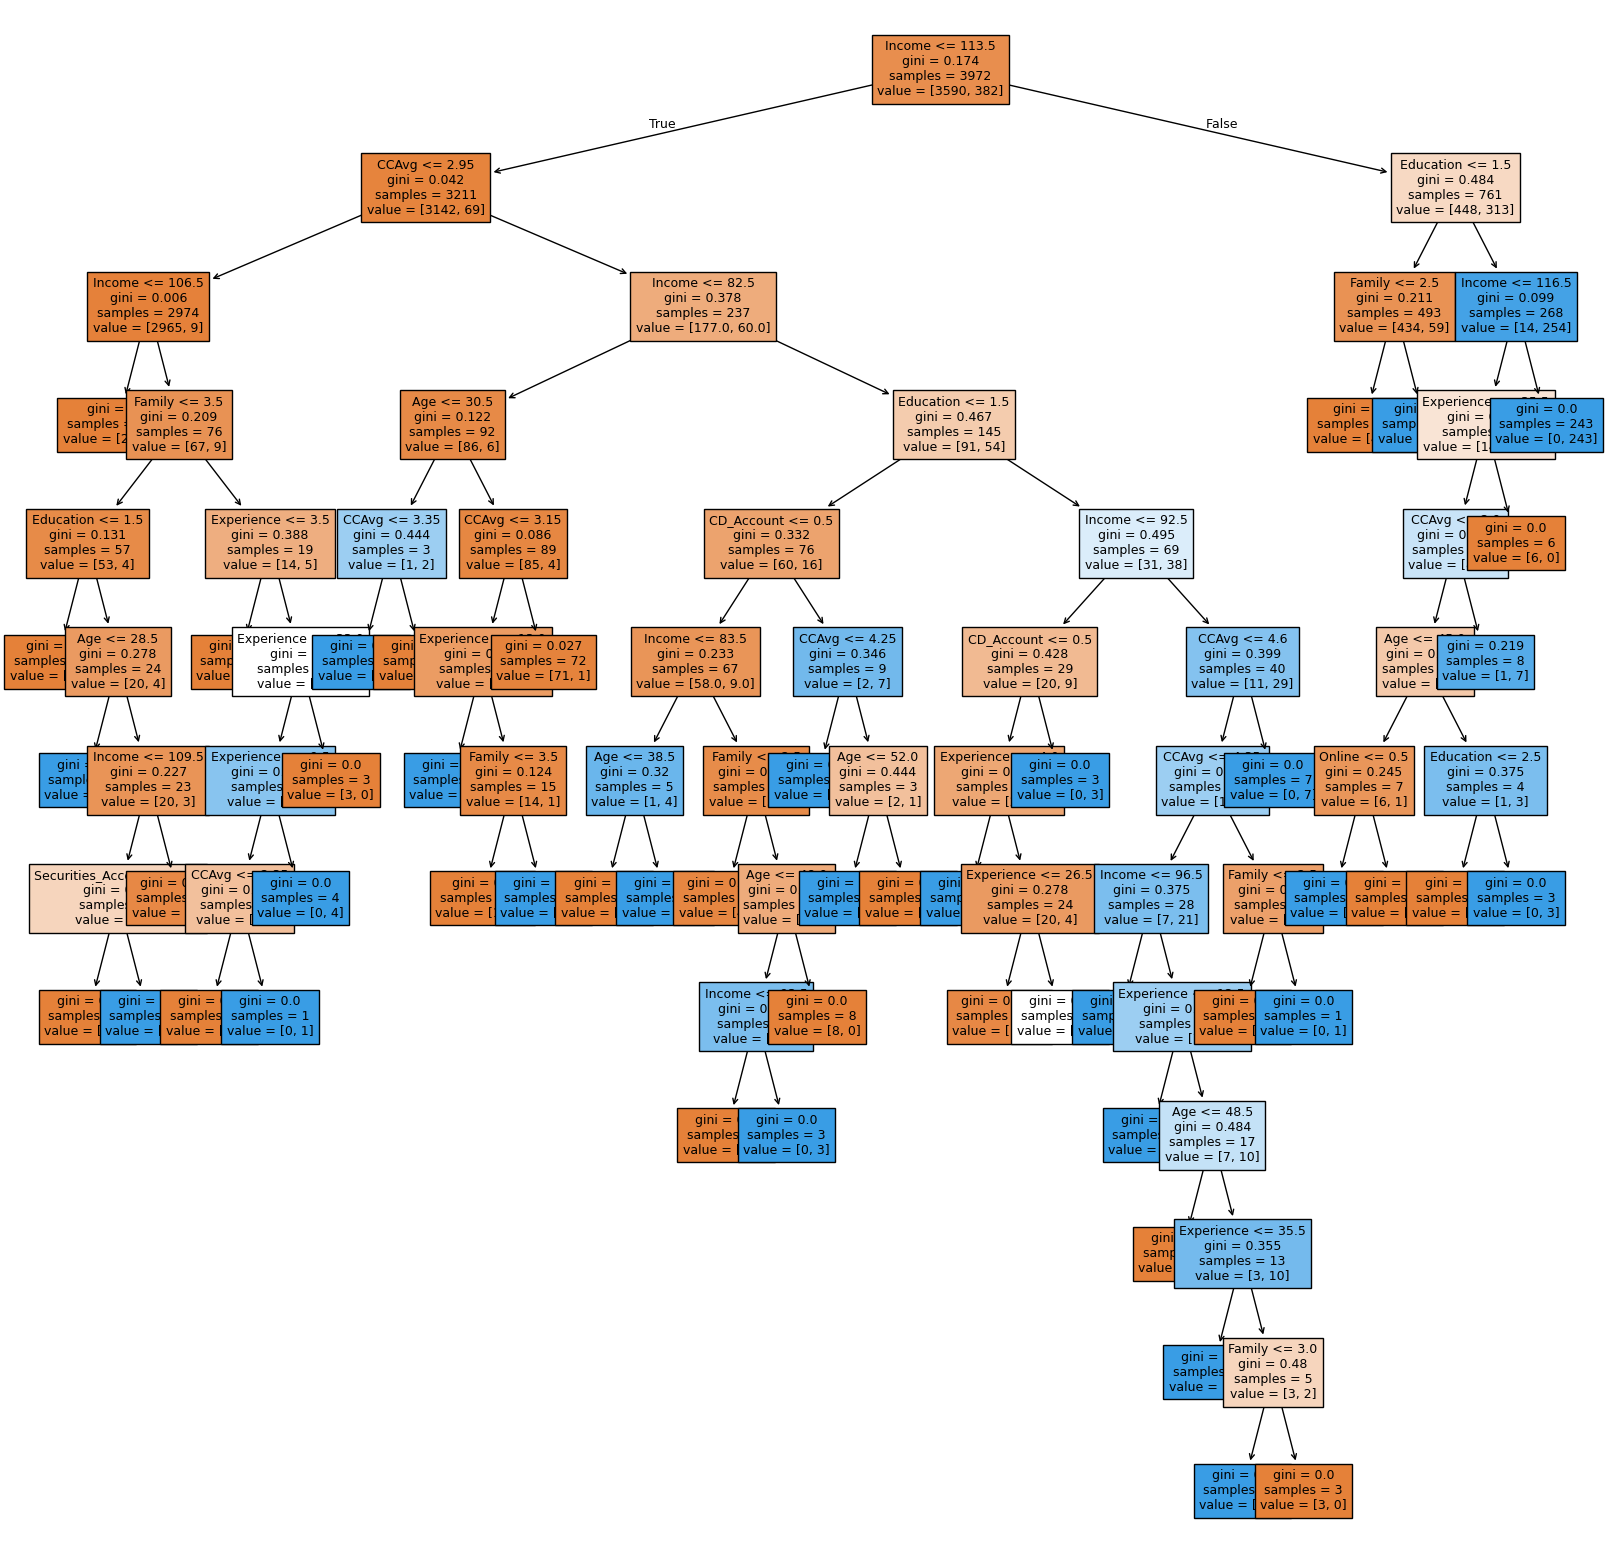

In [115]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

# Show the plot
plt.show()

In [116]:
# printing a text report showing the rules of tree
print(
    tree.export_text(
        dtree3,
        feature_names=feature_names,
        show_weights=True
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2898.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [33.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Income <= 109.50
|   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- Income >  109.50
|   |   |   |   |   |   |   |--- weights: [17.00, 1.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [9.00, 0.00] class: 0


This tree is less complex than the original unpruned tree, which might have overfitted the data, but still more complex than the pre-pruned tree.

---

# **Model Performance Comparison and Final Model Selection**

In [117]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.985650,0.997734
Recall,1.0,0.884817,0.979058
Precision,1.0,0.962963,0.997333
F1,1.0,0.922237,0.988111


In [118]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.988934,0.984909,0.990946
Recall,0.947368,0.894737,0.947368
Precision,0.937500,0.944444,0.957447
F1,0.942408,0.918919,0.952381


#### Observations:

* Both the pre-pruned and post-pruned decision trees show good generalization across the training and test sets, with the post-pruned tree offering the best overall performance.

* Post pruned tree strikes a balance between simplicity and complexity, using key features like income, credit card spending, and family size to predict loan acceptance.

**Model Selection:**

* The post-pruned decision tree is the best model to move forward with, as it maintains high accuracy, recall, and precision.

### Feature Importance

**Decision Tree (Default)**

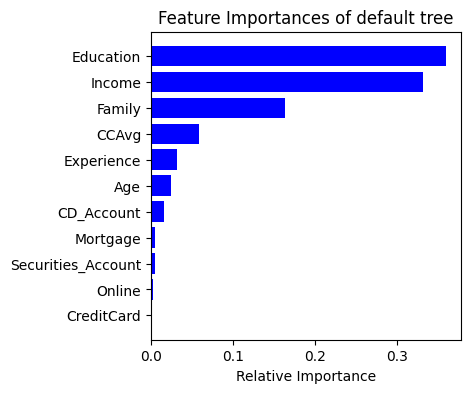

In [137]:
# importance of features in the default tree building
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(4,4))
plt.title("Feature Importances of default tree")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Decision Tree (Pre Pruned)**

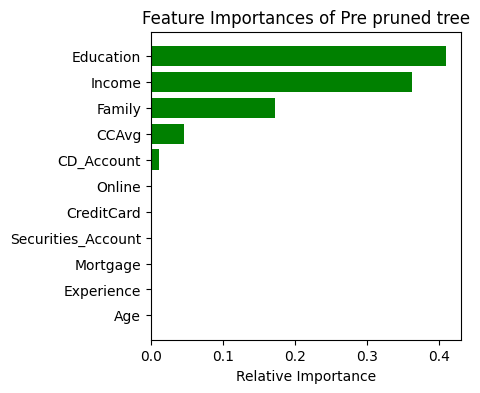

In [135]:
# importance of features in the pre pruned tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(4,4))
plt.title("Feature Importances of Pre pruned tree")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Decision Tree (Post Pruned)**

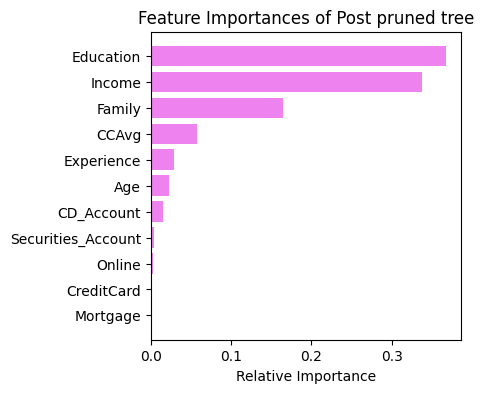

In [134]:
# importance of features in the post pruned tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(4,4))
plt.title("Feature Importances of Post pruned tree")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:

* Education and Income consistently appear as the most important features across all three models (Default, Pre-pruned, and Post-pruned).

* Family and CCAvg are the next best attributes to consider.

# **Insights and Recommendations:**

**Insights:**

* **Feature Importance:** Education and income consistently appeared as the most significant features across all models (default, pre-pruned, and post-pruned). This suggests that these features have the highest impact on predicting personal loan acceptance.

* **Model Selection:** The post-pruned decision tree gave slightly better results for F1 score, precision, and recall. This means it works better with new data and avoids overfitting. So, it’s the better choice for making accurate predictions.

**Business Recommendations for All Life Bank:**

* Income and Education are the biggest factors in predicting whether someone will accept a personal loan. All Life Bank should focus on collecting accurate and up-to-date information about these two things during the loan application. This will help the bank better predict who’s likely to take a loan and offer more personalized loan options.

* Since Education and Income are important in loan decisions, All Life Bank can create targeted marketing campaigns for people in certain income and education groups.

* The Post-pruned Decision Tree showed strong performance in predicting loan acceptances with better generalization on unseen data. All Life Bank can implement this model in their loan approval process.


# **Thank You!**

---